# Plotting correlation between columns
use this file to plot correlation between columns, taking the original imdb dataset as data since this one has the most movies in it.


In [18]:
# import neccessary stuff 
#run this from the datascience-films folder
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from pathlib import Path
import seaborn as sns 

# ignore some warnings, not pressing to fix these issues, more annoying to show these
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

RESOURCE_PATH = Path('../cleaned_data')
# import the data
df= pd.read_csv(RESOURCE_PATH / 'final_data_movies.csv',sep=',')
df = df[df['years_after_event'].notna()]
df = df[df['numVotes'].notna()]
df = df[df['numVotes'] < 10000]

In [19]:
#extract historical_event, and target data, in this case the movie release year/years_after_event and the average rating
df['years_after_event'] = df.years_after_event.dropna()
#lastly pop our target we want
df['target'] = list(zip(df.years_after_event, df.averageRating))
target = df[['years_after_event','averageRating']]
target.averageRating =  target.averageRating.fillna(1)

In [20]:
numeric_feature_names = ['numVotes','averageRating']
numeric_features = df[numeric_feature_names]
numeric_features['numVotes'] = numeric_features['numVotes'].fillna(0)
numeric_features['numVotes'] = numeric_features['numVotes'].astype(np.int64)
numeric_features = numeric_features.dropna()

# Visualizing corrolation between the movie release year/ years after event  and the average rating/ number of votes

Uses a pairplot to plot the correlation between de features

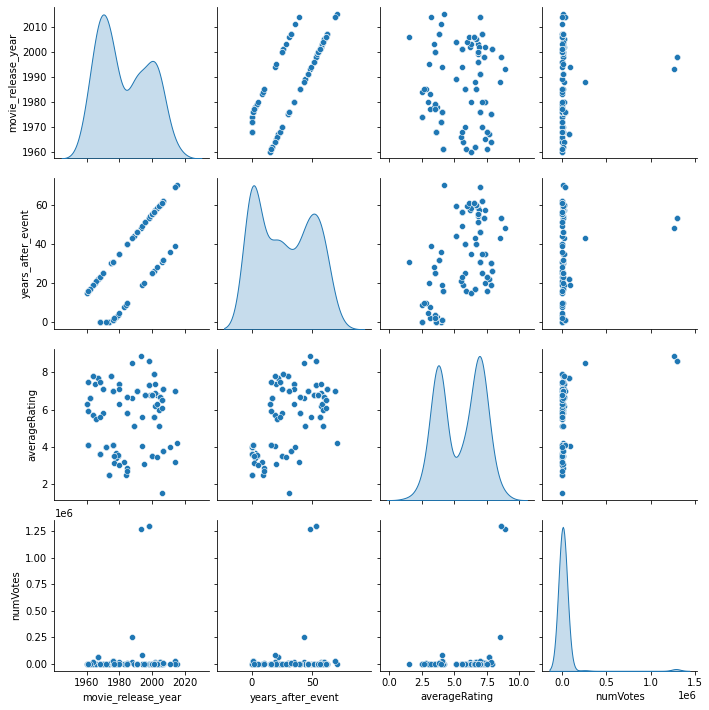

In [21]:
sns.pairplot(df[['movie_release_year', 'years_after_event', 'averageRating', 'numVotes']], diag_kind='kde')
